In this test, I aim to verify the correctness of the `ClassicalShadow_1_CLIFFORD` approximation. To do this, I will override the `get_random_rotations` method. Specifically, it will be modified to always return the Hadamar operator. When this is applied to a simple $|0\rangle$ state, it becomes poblaistic but possible calculate the density matrix that the shadow should approximate.

In [1]:
# Imports
import sys

sys.path.insert(0, "../../..")

from qiskit import QuantumCircuit, qasm2
from qiskit.quantum_info import Clifford, StabilizerState
from qiskit.visualization import array_to_latex
from qiskit_aer import AerSimulator

import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Clifford
from qiskit_aer import AerSimulator

from classical_shadow_1_clifford import ClassicalShadow_1_CLIFFORD
from shadow_protocol import ShadowProtocol


from classical_shadow_1_clifford import ClassicalShadow_1_CLIFFORD
from shadow_protocol import ShadowProtocol

In [2]:
class Always_id_classical_shadow_1_clifford(ClassicalShadow_1_CLIFFORD):
    def get_random_rotations(self, num_qubits) -> list[Clifford]:
        qc_x = QuantumCircuit(1)
        qc_x.sdg(0)  
        qc_x.h(0)    
        c_x = Clifford(qc_x)
        return [(c_x) for _ in range(num_qubits)]
    

# Setup Experiment
class Id_Protocol(ShadowProtocol):

    def get_num_qubits(self) -> int:
        return 2
    
    def get_state_circuit(self) -> QuantumCircuit:
        circuit = QuantumCircuit(2)
        return circuit

    def run_cuircuit_and_get_measurment(self, circuit) -> list[int]:
        sim = AerSimulator()

        # Run with 997 shots
        job = sim.run(circuit, shots=997)
        result = job.result()

        counts = result.get_counts()
        max_hits= max(counts, key=counts.get)
        bit_list =  [int(bit) for bit in list(max_hits)]
        return bit_list[::-1] 
    
id_protocol = Id_Protocol()
# Create Classical Shadow Instance
always_id = Always_id_classical_shadow_1_clifford(id_protocol)


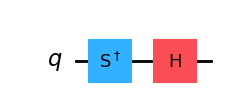

In [3]:
found_clifford = {}

for cliff in always_id.get_random_rotations(1000):
    circuit=cliff.to_circuit()
    program_as_string = qasm2.dumps(circuit)
    found_clifford[program_as_string]=cliff

cliffs = list(found_clifford.values())
assert len(cliffs) == 1
display(cliffs[0].to_circuit().draw("mpl"))

This means we will alwaysthis rotation, so the state $\rho$ wil become in a super position

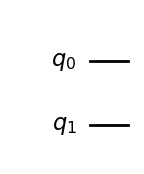

<IPython.core.display.Latex object>

In [4]:
circuit = always_id.shadow_protocol.get_state_circuit()
display(circuit.draw("mpl"))

dm = always_id.get_original_density_matrix()
display(array_to_latex(dm, prefix="Rho = "))

Putting this together, we expect a circuit that simply measures the qubits without applying any unitary gates beforehand.

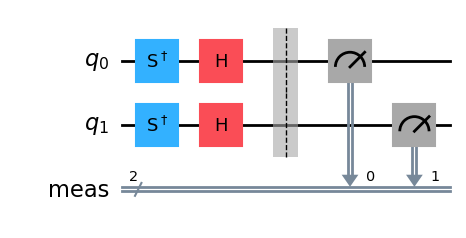

In [5]:

state_circuit = always_id.shadow_protocol.get_state_circuit()
cliffords = always_id.get_random_rotations(2) # will always be the same as showed before

combined_circuit: QuantumCircuit = always_id.make_rotated_state_circuit(
            cliffords, state_circuit
        )
display(combined_circuit.draw("mpl"))

For this circuit, we expect to have a 25% outocome 01 10 11 00

In [6]:
output = {}

for _ in range(100):
    measurement = str(always_id.shadow_protocol.run_cuircuit_and_get_measurment(combined_circuit))
    
    output[measurement] = output.get(measurement, 0) + 1

assert len(output) == 4

for outcome, count in output.items():
    print(outcome, count)

[0, 0] 25
[0, 1] 28
[1, 1] 27
[1, 0] 20


We have 4 outcomes with same problility so we need to calcualte every rotated back result:

00:

In [7]:
stabilizers00: list[StabilizerState] = (
            always_id.compute_clifford_applied_to_measurements(
                cliffords, [0,0]
            )
        )
for i , stab in enumerate(stabilizers00):
    dm = always_id.stabilizer_to_density_matrix(stab)
    display(array_to_latex(dm, prefix=f"DM {i}= "))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

01:

In [8]:
stabilizers01: list[StabilizerState] = (
            always_id.compute_clifford_applied_to_measurements(
                cliffords, [0,1]
            )
        )
for i , stab in enumerate(stabilizers01):
    dm = always_id.stabilizer_to_density_matrix(stab)
    display(array_to_latex(dm, prefix=f"DM {i}= "))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

10:

In [9]:
stabilizers10: list[StabilizerState] = (
            always_id.compute_clifford_applied_to_measurements(
                cliffords, [1,0]
            )
        )
for i , stab in enumerate(stabilizers10):
    dm = always_id.stabilizer_to_density_matrix(stab)
    display(array_to_latex(dm, prefix=f"DM {i}= "))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

11:

In [10]:
stabilizers11: list[StabilizerState] = (
            always_id.compute_clifford_applied_to_measurements(
                cliffords, [1,1]
            )
        )
for i , stab in enumerate(stabilizers11):
    dm = always_id.stabilizer_to_density_matrix(stab)
    display(array_to_latex(dm, prefix=f"DM {i}= "))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Now we can claculate the expected outcome for this state.

In [11]:
always_id.stabilizer_list_list = [stabilizers00,stabilizers01,stabilizers10,stabilizers11]

dm = always_id.get_desity_matrix_from_stabilizers()
display(array_to_latex(dm, prefix=f"DM {i}= "))

<IPython.core.display.Latex object>